----
# Laboratorium 6 - Układy stabilne i minimalnofazowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----

* badanie stabilności układu (stabilność w sensie BIBO) 
* analiza układów zamkniętych pętlą sprzężenia zwrotnego
* analiza układów minimalnofazowych
* zera i bieguny transmitancji  

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
poles_figsize  =(8, 8)
default_figsize=(14, 8)

---- 
## 1. Pojęcie stabilności
---- 
* Co to znaczy że układ jest stabilny?
* Jakie są kryteria stabilności?
* Jak sprawdzić czy układ jest stabilny?

---- 
## 2. Zbadaj stabilność w sensie BIBO
---- 
| | |
|------------------------------------------|------------------------------------|
|$$H(s) = {{s^2-2s+3} \over {s^2+2s+ 1}}$$  |  $$H(s) = {{s^2+1}\over{s^2+3s+1}}$$|
|$$ H(s) = {{1} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +8s+15}} $$|
|$$ H(s) = {{s^2-2s+3} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +6s-7}} $$|
|$$ H(s) = {{s + 2} \over {s + 1}} $$  |$$ H(s) = {{1} \over {s+1}} $$|
|$$ H(s) = {{s - 1} \over {s + 1}} $$|$$ H(s) = {{1} \over {s-1}} $$|
|$$ H(s) = {{2s+3} \over {s^2 + 4s + 4}} $$|$$ H(s) = {{s+1} \over {s+ 2}} $$|
|$$ H(s) = {{s^4+2s^3+2s^2+2} \over {s^3-2s^2 + 4s + 1}} $$|$$ H(s) = {{s-1} \over {s+ 2}} $$|
W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję np.poly1d oraz np.roots. Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami. 


1 - [-1. -1.]
2 - [-0.+1.41421356j  0.-1.41421356j]
3 - [-0.+1.41421356j  0.-1.41421356j]
4 - [-1.]
5 - [-1.]
6 - [-2. -2.]
7 - [ 1.11124726+1.80544243j  1.11124726-1.80544243j -0.22249451+0.j        ]
8 - [-2.61803399 -0.38196601]
9 - [-5. -3.]
10 - [-7.  1.]
11 - [-1.]
12 - [1.]
13 - [-2.]
14 - [-2.]


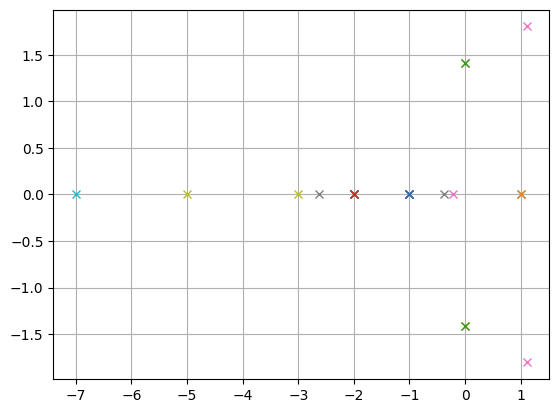

In [8]:
#define list of denominators
denominators = [np.poly1d([1,2,1]), np.poly1d([1,0,2]), np.poly1d([1,0,2]), np.poly1d([1,1]), 
                np.poly1d([1,1]), np.poly1d([1,4,4]), np.poly1d([1,-2,4,1]), np.poly1d([1,3,1]), 
                np.poly1d([1,8,15]), np.poly1d([1,6,-7]), np.poly1d([1,1]), np.poly1d([1,-1]), 
                np.poly1d([1,2]), np.poly1d([1,2])]

#for each denominator from list - calculate roots
iterator = 1
for denominator in denominators:
    print(iterator, "-", np.roots(denominator))
    plt.plot(np.roots(denominator).real, np.roots(denominator).imag, "x")
    iterator += 1

plt.grid()
plt.show()

----
## 3. Sprawdź właściwości systemów
-----------------
* na 1. wykresie umieść charakterystyki amplitudowe wszystkich układów
* na 2. wykresie umieść charakterystyki fazowe wszystkich układów
* na 3. wykresie zaznacz połóożenie zer biegonów dla wszystkich układów

Transmitancje układów:
$$H_1(s) = {{s^2+6s+8} \over {s^2+2s+ 3}}$$
$$H_2(s) = {{s^2-2s-8} \over {s^2+2s+ 3}}$$
$$H_3(s) = {{s^2-6s+8} \over {s^2+2s+ 3}}$$
$$H_4(s) = {{s^2+2s-8} \over {s^2+2s+ 3}}$$

Wskaż układ minimalnofazowy



C:\Users\Jan\AppData\Local\Temp\ipykernel_2624\1533489726.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figMP.show()
C:\Users\Jan\AppData\Local\Temp\ipykernel_2624\1533489726.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figZP.show()


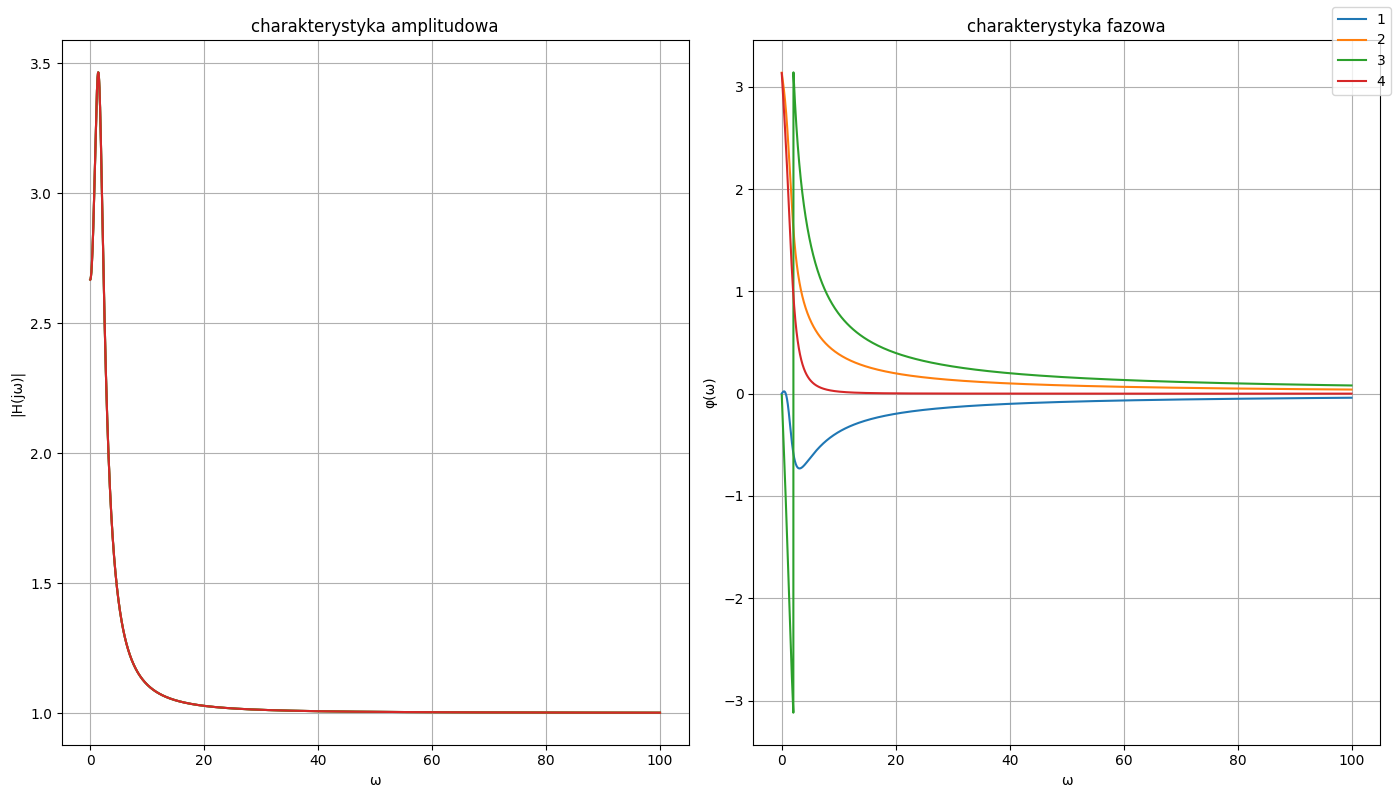

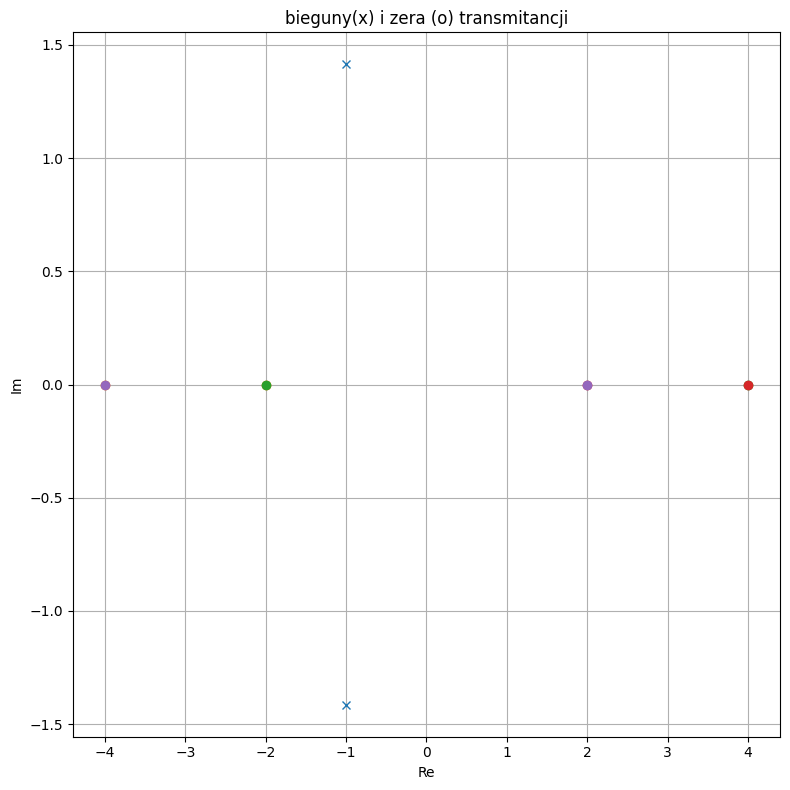

In [9]:
#define list of numerators
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3]

w = np.logspace(-2, 2, 1000)
denom = np.polyval(denominator, 1j*w)

figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize)
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

axZP.plot(np.roots(denominator).real, np.roots(denominator).imag, "x")

for idx, numerator in enumerate(numerators):
    #charakterystyka amplitudowa 
    numera = np.polyval(numerator, 1j*w)
    axsMP[0].plot(w, np.abs(numera/denom), label=idx+1)
    
    #charakterystyka fazowa
    axsMP[1].plot(w, np.angle(numera/denom))
    
    #zera transmitancji
    axZP.plot(np.roots(numerator).real, np.roots(numerator).imag, "o")
    
    

axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid()
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
figMP.legend()
figMP.tight_layout()
figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
axZP.grid()
figZP.tight_layout()
figZP.show()